# Agent-Based Modeling of Collective Emotions: Implementing the Cyberemotions Framework

This notebook gives a very short overview into the results of our implemented model and by no means constitutes a full analysis of model data. We used it primarily to experiment with model parameters to find the setting that produces the most realistic results.

## Exploration of model data

All data files imported are no longer accessible and this documentation only serves as a small insight into our working process.

### Data import

First, all model results are appended one by one into one constant dataframe.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILES = glob.glob("data/cyberemotions*.feather")

list_of_files = FILES
dataset = pd.DataFrame()

for file in list_of_files:
    df = pd.read_feather(file)
    dataset = dataset.append(df, ignore_index=True)

DATA = dataset.dropna()

### Data overview

Since model output was uniform dataframes, they were easily combined into one large dataframe countaining roughly 567,000 rows with the following 10 columns:

| Run | Agents | s | c | Step | v | a | A | N | h |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Model run | Initial agents | Impact parameter | Satiation parameter | Timestep | Agent valence | Agent arousal | Active agents | Expressions | Field charge |

The following tables give an overview of the resulting dataframe.

In [3]:
DATA.head()

,Run,Agents,s,c,Step,v,a,A,N,h
0,0.0,100.0,0.11,1.0,0.0,0.28,-0.27,100.0,0.0,0.00
1,0.0,100.0,0.11,1.0,1.0,0.33,-0.45,79.0,0.0,0.00
2,0.0,100.0,0.11,1.0,2.0,0.41,-0.22,67.0,1.0,-0.11
3,0.0,100.0,0.11,1.0,3.0,0.62,-0.18,58.0,2.0,-0.03
4,0.0,100.0,0.11,1.0,4.0,0.45,-0.29,49.0,0.0,-0.01


In [4]:
DATA.tail()

,Run,Agents,s,c,Step,v,a,A,N,h
5348250,99.0,300.0,0.2,3.0,15.0,0.00,-0.48,1.0,1.0,4.30
5348251,99.0,300.0,0.2,3.0,16.0,0.27,-0.71,1.0,0.0,1.29
5348252,99.0,300.0,0.2,3.0,17.0,0.21,-0.92,1.0,0.0,0.39
5348253,99.0,300.0,0.2,3.0,18.0,0.20,-0.74,1.0,0.0,0.12
5348254,99.0,300.0,0.2,3.0,19.0,0.30,-0.73,1.0,0.0,0.03


### Data extraction

The following lists provide an overview about the key parameters the model was run with:

In [5]:
print("List of all values for s = " + str(DATA["s"].unique()))
print("List of all values for c = " + str(DATA["c"].unique()))
print("Number of agents = " + str(DATA["Agents"].unique()))
print("Times each setting was run = " + str(len(DATA["Run"].unique())))

List of all values for s = [0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]
List of all values for c = [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3. ]
Number of agents = [100. 200. 300.]
Times each setting was run = 100


At this point, model data is aggregated by model setting, meaning each row describes all model runs for one specific set of parameters

In [6]:
results = pd.DataFrame()
results = DATA.groupby(["Agents", "s", "c", "Run"]).mean()
results.Step = DATA.groupby(["Agents", "s", "c", "Run"]).max().Step
results.N = DATA.groupby(["Agents", "s", "c", "Run"]).sum().N
df = results.reset_index()
df["EpA"] = df.N / df.Agents
results = df.groupby(["Agents", "s", "c"]).mean()
results["Nstd"] = df.groupby(["Agents", "s", "c"]).std().N
results["EpAstd"] = df.groupby(["Agents", "s", "c"]).std().EpA
#results["EpA"] = results.groupby(["Agents", "s", "c"]).mean()
results = results.drop(columns=["Run"]).reset_index()
results

,Agents,s,c,Step,v,a,A,N,h,EpA,Nstd,EpAstd
0,100.0,0.11,1.0,43.98,0.166856,-0.118174,22.019754,298.73,0.565295,2.987300,387.114914,3.871149
1,100.0,0.11,1.1,43.21,0.148440,-0.112328,21.121733,282.84,0.538559,2.828400,364.429365,3.644294
2,100.0,0.11,1.2,37.51,0.141136,-0.138212,21.840082,217.11,0.409651,2.171100,312.996398,3.129964
3,100.0,0.11,1.3,34.50,0.127327,-0.143852,21.432672,174.09,0.311588,1.740900,266.652693,2.666527
4,100.0,0.11,1.4,30.17,0.081320,-0.171242,21.606328,119.18,0.156300,1.191800,220.737990,2.207380
...,...,...,...,...,...,...,...,...,...,...,...,...
624,300.0,0.20,2.6,53.24,0.302438,0.410922,47.707891,519.52,16.497379,1.731733,100.563511,0.335212
625,300.0,0.20,2.7,50.57,0.435324,0.464559,68.854551,485.79,34.050579,1.619300,105.815858,0.352720
626,300.0,0.20,2.8,62.69,0.214300,0.508917,63.632490,493.97,11.645512,1.646567,102.767999,0.342560
627,300.0,0.20,2.9,62.86,0.495616,0.445018,52.151913,509.26,30.142381,1.697533,108.458401,0.361528


### Data visualization

At first, we look for how many time steps the model runs given impact coefficient `s` and satiation factor `c`, and compare it for runs with different numbers of agents.

As the field coefficient `s` increases, the number of timesteps steadily ecreases.

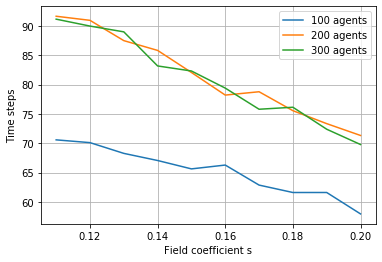

In [7]:
ax = plt.figure().add_subplot()

results[results.Agents == 100].groupby("s").mean().reset_index().plot(x="s", y="Step", grid=True, label="100 agents", ax=ax)
results[results.Agents == 200].groupby("s").mean().reset_index().plot(x="s", y="Step", grid=True, label="200 agents", ax=ax)
results[results.Agents == 300].groupby("s").mean().reset_index().plot(x="s", y="Step", grid=True, label="300 agents", ax=ax).set(xlabel="Field coefficient s", ylabel="Time steps")

plt.show()

Interesting are the sudden increase for runs with 100 agents at `c = 1.6` and the convergence to the other agent groups, and the short spike for the 200 agent group at `c = 2.5`.

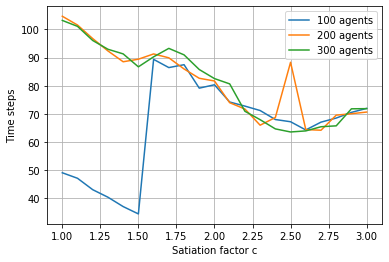

In [8]:
ax = plt.figure().add_subplot()

results[results.Agents == 100].groupby("c").mean().reset_index().plot(x="c", y="Step", grid=True, label="100 agents", ax=ax)
results[results.Agents == 200].groupby("c").mean().reset_index().plot(x="c", y="Step", grid=True, label="200 agents", ax=ax)
results[results.Agents == 300].groupby("c").mean().reset_index().plot(x="c", y="Step", grid=True, label="300 agents", ax=ax).set(xlabel="Satiation factor c", ylabel="Time steps")

plt.show()

Our primary output variable of interest is the number of agent expressions, since it allows us to compare the model with real-world data.

#### 100 agents

Looking at the 100 agents group specifically and comparing field coefficient `s` and satiation factor `c`, gives more insight as to why the above observation may occur.

A field coefficient `s <= 0.14` results in a much smaller number of expressions per agent that only start converging at `c = 1.6` and could represent a tipping point.

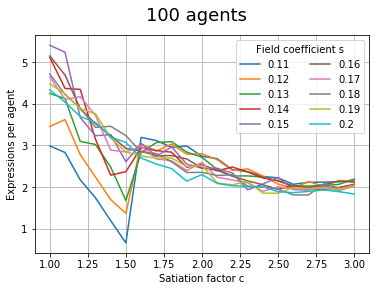

In [9]:
ax = plt.figure().add_subplot()

df1 = results[results.Agents == 100].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

for nm, obj in df1.groupby("s"):
    obj.plot(x="c", y="EpA", grid=True, label=nm, ax=ax)

ax.set_xlabel("Satiation factor c")
ax.set_ylabel("Expressions per agent")
#ax.set_yticks(range(0,12))
ax.legend(title="Field coefficient s", ncol=2)
plt.suptitle("100 agents", fontsize=18)
#plt.savefig("fig1.png", bbox_inches="tight")
plt.show()

A detailed look into these results also reveals much larger standard deviations for the same combination of parameters. Although, the deviation from the general pattern becomes smaller as field coefficient `s` increases.

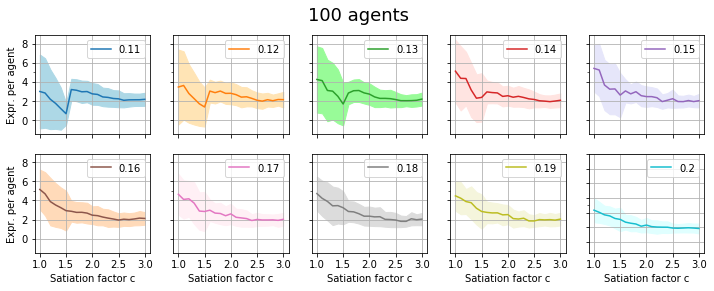

In [10]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(251)
ax1, ax2, ax3, ax4 = fig.add_subplot(252, sharey=ax, sharex=ax), fig.add_subplot(253, sharey=ax, sharex=ax), fig.add_subplot(254, sharey=ax, sharex=ax), fig.add_subplot(255, sharey=ax, sharex=ax)
ax5, ax6, ax7, ax8, ax9 = fig.add_subplot(256, sharey=ax, sharex=ax), fig.add_subplot(257, sharey=ax, sharex=ax), fig.add_subplot(258, sharey=ax, sharex=ax), fig.add_subplot(259, sharey=ax, sharex=ax), fig.add_subplot(2,5,10, sharey=ax, sharex=ax)
#ax10, ax11, ax12, ax13, ax14 = fig.add_subplot(3,5,11, sharey=ax, sharex=ax), fig.add_subplot(3,5,12, sharey=ax, sharex=ax), fig.add_subplot(3,5,13, sharey=ax, sharex=ax), fig.add_subplot(3,5,14, sharey=ax, sharex=ax), fig.add_subplot(3,5,15, sharey=ax, sharex=ax)
axes = [ax, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]#, ax10, ax11, ax12, ax13, ax14]

color1 = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
color2 = ["lightblue", "moccasin", "palegreen", "mistyrose", "lavender", "peachpuff", "lavenderblush", "gainsboro", "beige", "lightcyan", "lightblue", "moccasin", "palegreen", "mistyrose", "lavender"]

df1 = results[results.Agents == 100].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

n = 0
for s in df1.s.unique():
    axis = axes[n]
    c1, c2 = color1[n], color2[n]
    n += 1
    d = df1[df1.s == s]
    d.plot(x="c", y="EpA", grid=True, label=str(s), c=c1, ax=axis)
    axis.fill_between(x=d.c, y1=(d.EpA + d.EpAstd), y2=(d.EpA - d.EpAstd), color=c2)
    axis.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0])
    axis.set_yticks([0, 2, 4, 6, 8, 10, 12])
    axis.set_xlabel("Satiation factor c")
    axis.set_ylabel("Expr. per agent")

plt.suptitle("100 agents", fontsize=18)
# plt.savefig("fig2.png", bbox_inches="tight")
plt.show()

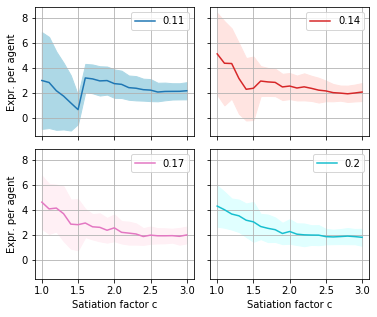

In [11]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(221)
ax1, ax2, ax3 = fig.add_subplot(222, sharey=ax, sharex=ax), fig.add_subplot(223, sharey=ax, sharex=ax), fig.add_subplot(224, sharey=ax, sharex=ax)
axes = [ax, ax1, ax2, ax3]

df = results.loc[results.Agents == 100].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]
df = df.loc[(df.s ==0.11) | (df.s == 0.14) | (df.s == 0.17) | (df.s == 0.2)]

color1 = ["tab:blue", "tab:red", "tab:pink", "tab:cyan"]
color2 = ["lightblue", "mistyrose", "lavenderblush", "lightcyan"]

n = 0
for s in df.s.unique():
    axis = axes[n]
    c1, c2 = color1[n], color2[n]
    n += 1
    d = df[df.s == s]
    d.plot(x="c", y="EpA", grid=True, label=str(s), c=c1, ax=axis)
    axis.fill_between(x=d.c, y1=(d.EpA + d.EpAstd), y2=(d.EpA - d.EpAstd), color=c2)
    axis.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0])
    #axis.set_yticks([0, 1.5, 2, 2.5, 3])
    axis.set_xlabel("Satiation factor c")
    axis.set_ylabel("Expr. per agent")

plt.subplots_adjust(hspace=0.1, wspace=0.1)
# plt.savefig("m-line-csexpr100.png", bbox_inches="tight")
plt.show()

#### 200 Agents

In the 200 agents group, `c = 2.5` results in an large spike of agent expressions for all values `s > 0.11`.

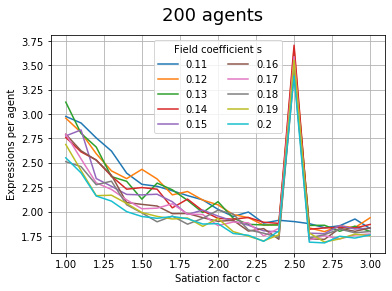

In [12]:
ax = plt.figure().add_subplot()

df2 = results[results.Agents == 200].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

for nm, obj in df2.groupby("s"):
    obj.plot(x="c", y="EpA", grid=True, label=nm, ax=ax)

ax.set_xlabel("Satiation factor c")
ax.set_ylabel("Expressions per agent")
#ax.set_yticks(range(0,12))
ax.legend(title="Field coefficient s", ncol=2)
plt.suptitle("200 agents", fontsize=18)
#plt.savefig("fig1.png", bbox_inches="tight")
plt.show()

A more detailed analysis shows that there is no visible deviation at `c = 2.5` for `s = 0.11` at all, while the spike seems to stay the size for all settings until `s = 0.2`.

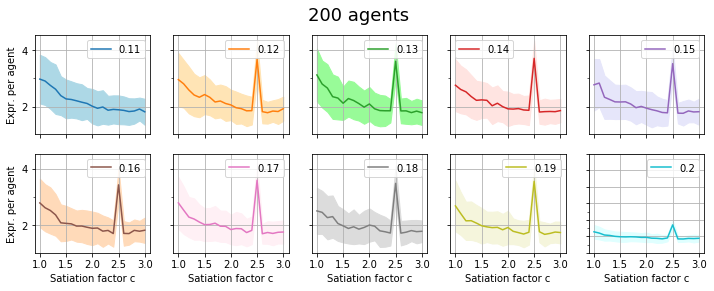

In [13]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(251)
ax1, ax2, ax3, ax4 = fig.add_subplot(252, sharey=ax, sharex=ax), fig.add_subplot(253, sharey=ax, sharex=ax), fig.add_subplot(254, sharey=ax, sharex=ax), fig.add_subplot(255, sharey=ax, sharex=ax)
ax5, ax6, ax7, ax8, ax9 = fig.add_subplot(256, sharey=ax, sharex=ax), fig.add_subplot(257, sharey=ax, sharex=ax), fig.add_subplot(258, sharey=ax, sharex=ax), fig.add_subplot(259, sharey=ax, sharex=ax), fig.add_subplot(2,5,10, sharey=ax, sharex=ax)
#ax10, ax11, ax12, ax13, ax14 = fig.add_subplot(3,5,11, sharey=ax, sharex=ax), fig.add_subplot(3,5,12, sharey=ax, sharex=ax), fig.add_subplot(3,5,13, sharey=ax, sharex=ax), fig.add_subplot(3,5,14, sharey=ax, sharex=ax), fig.add_subplot(3,5,15, sharey=ax, sharex=ax)
axes = [ax, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]#, ax10, ax11, ax12, ax13, ax14]

df2 = results[results.Agents == 200].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

color1 = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
color2 = ["lightblue", "moccasin", "palegreen", "mistyrose", "lavender", "peachpuff", "lavenderblush", "gainsboro", "beige", "lightcyan", "lightblue", "moccasin", "palegreen", "mistyrose", "lavender"]

n = 0
for s in df2.s.unique():
    axis = axes[n]
    c1, c2 = color1[n], color2[n]
    n += 1
    d = df2[df2.s == s]
    d.plot(x="c", y="EpA", grid=True, label=str(s), c=c1, ax=axis)
    axis.fill_between(x=d.c, y1=(d.EpA + d.EpAstd), y2=(d.EpA - d.EpAstd), color=c2)
    axis.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0])
    axis.set_yticks([0, 2, 4, 6, 8, 10, 12])
    axis.set_xlabel("Satiation factor c")
    axis.set_ylabel("Expr. per agent")

plt.suptitle("200 agents", fontsize=18)
# plt.savefig("fig2.png", bbox_inches="tight")
plt.show()

#### 300 agents

For 300 agents, the general pattern of decrease for agent expressions as field coefficient `s` and satiation factor `c` rise remains constant without spikes or any visible tipping points.

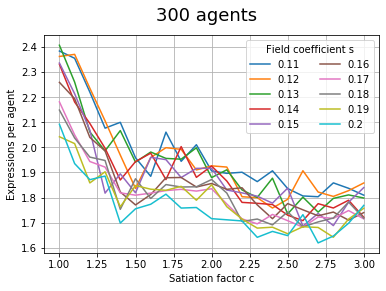

In [14]:
ax = plt.figure().add_subplot()

df3 = results[results.Agents == 300].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

for nm, obj in df3.groupby("s"):
    obj.plot(x="c", y="EpA", grid=True, label=nm, ax=ax)

ax.set_xlabel("Satiation factor c")
ax.set_ylabel("Expressions per agent")
#ax.set_yticks(range(0,12))
ax.legend(title="Field coefficient s", ncol=2)
plt.suptitle("300 agents", fontsize=18)
# plt.savefig("m-line-csexpr300.png", bbox_inches="tight")
plt.show()

Since the general pattern of the relationship of agent expressions in combination with field coefficient `s` and satiation factor `c` are clear, we can focus on using these results to find the combination of parameters that generate a realistic number of agent expressions (~1.9 expressions).

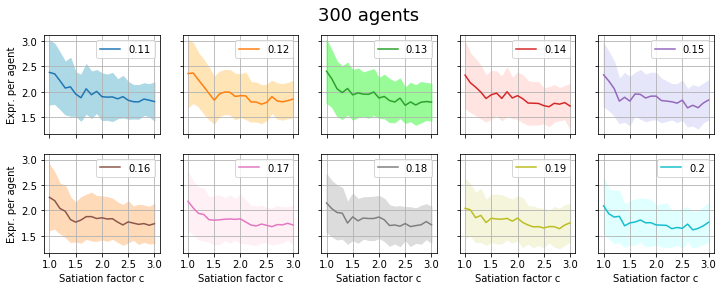

In [15]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(251)
ax1, ax2, ax3, ax4 = fig.add_subplot(252, sharey=ax, sharex=ax), fig.add_subplot(253, sharey=ax, sharex=ax), fig.add_subplot(254, sharey=ax, sharex=ax), fig.add_subplot(255, sharey=ax, sharex=ax)
ax5, ax6, ax7, ax8, ax9 = fig.add_subplot(256, sharey=ax, sharex=ax), fig.add_subplot(257, sharey=ax, sharex=ax), fig.add_subplot(258, sharey=ax, sharex=ax), fig.add_subplot(259, sharey=ax, sharex=ax), fig.add_subplot(2,5,10, sharey=ax, sharex=ax)
#ax10, ax11, ax12, ax13, ax14 = fig.add_subplot(3,5,11, sharey=ax, sharex=ax), fig.add_subplot(3,5,12, sharey=ax, sharex=ax), fig.add_subplot(3,5,13, sharey=ax, sharex=ax), fig.add_subplot(3,5,14, sharey=ax, sharex=ax), fig.add_subplot(3,5,15, sharey=ax, sharex=ax)
axes = [ax, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]#, ax10, ax11, ax12, ax13, ax14]

df3 = results[results.Agents == 300].loc[:, ("Agents", "s", "c", "EpA", "EpAstd")]

color1 = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
color2 = ["lightblue", "moccasin", "palegreen", "mistyrose", "lavender", "peachpuff", "lavenderblush", "gainsboro", "beige", "lightcyan", "lightblue", "moccasin", "palegreen", "mistyrose", "lavender"]

n = 0
for s in df3.s.unique():
    axis = axes[n]
    c1, c2 = color1[n], color2[n]
    n += 1
    d = df3[df3.s == s]
    d.plot(x="c", y="EpA", grid=True, label=str(s), c=c1, ax=axis)
    axis.fill_between(x=d.c, y1=(d.EpA + d.EpAstd), y2=(d.EpA - d.EpAstd), color=c2)
    axis.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0])
    #axis.set_yticks([0, 1.5, 2, 2.5, 3])
    axis.set_xlabel("Satiation factor c")
    axis.set_ylabel("Expr. per agent")

plt.suptitle("300 agents", fontsize=18)
# plt.savefig("m-line-csexpr300_2.png", bbox_inches="tight")
plt.show()

#### Results when scaling field coefficient s

Using a different set of results, we try to generate a pattern of agent expressions that corresponds to real world data.

The following data was collected using a satiation factor of `c = 1.0` while the field coefficient was set to scale as `s = 55 / Number of agents` using the arbitrary number 55.

In [16]:
FILES = glob.glob("data/example/cyberemotions*.feather")

list_of_files = FILES
dataset = pd.DataFrame()

for file in list_of_files:
    df = pd.read_feather(file)
    dataset = dataset.append(df, ignore_index=True)

specific_results = dataset.dropna()

In [17]:
results1 = pd.DataFrame()
results1["N"] = specific_results.groupby(["Agents", "s", "Run"]).sum().N
results1["h"] = specific_results.groupby(["Agents", "s", "Run"]).mean().h
results1 = results1.reset_index()
results1.Agents = results1.Agents.apply(int)

This plot shows the increase of agent expressions as the number of agents in the simulation increases. The rate at which it scales is roughly 1.3, a realistic value that has been observed in many other instances of social scaling as well.

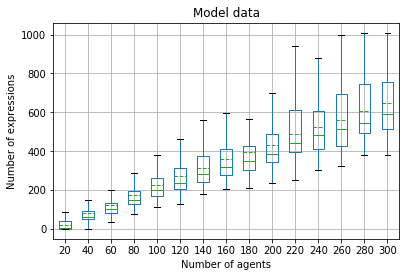

In [18]:
results1.boxplot(column="N", by="Agents", showmeans=True, meanline=True, showfliers=False).set(xlabel="Number of agents", ylabel="Number of expressions", title="Model data")

plt.suptitle("")
# plt.savefig("m-box-ag_expr.png", bbox_inches="tight")
plt.show()

In [19]:
results2 = pd.DataFrame()
results2 = specific_results.groupby(["Agents", "s", "c", "Run"]).mean()
results2.Step = specific_results.groupby(["Agents", "s", "c", "Run"]).max().Step
results2.N = specific_results.groupby(["Agents", "s", "c", "Run"]).sum().N
#results2.h = specific_results.groupby(["Agents", "s", "c", "Run"]).sum().h
df = results2.reset_index()
df["EpA"] = df.N / df.Agents
results2 = df.groupby(["Agents", "s", "c"]).mean()
results2["Nstd"] = df.groupby(["Agents", "s", "c"]).std().N
results2["Nsem"] = df.groupby(["Agents", "s", "c"]).sem().N
results2["EpAstd"] = df.groupby(["Agents", "s", "c"]).std().EpA
results2["EpAsem"] = df.groupby(["Agents", "s", "c"]).sem().EpA
results2["hstd"] = df.groupby(["Agents", "s", "c"]).std().h
results2["hsem"] = df.groupby(["Agents", "s", "c"]).sem().h
#results["EpA"] = results.groupby(["Agents", "s", "c"]).mean()
results2 = results2.drop(columns=["Run"]).reset_index()

In [20]:
def reg_xy(df, a, b, fit):
    '''Function that takes a dataframe and two of its columns as input and
    generates polynomial regression for a set fit, storing it in an output
    dataframe as "x" and "y" for later plotting.'''
    x = df.sort_values(a)[a]
    y = df.sort_values(a)[b]
    n = np.polyfit(x, y, fit)
    p = np.poly1d(n)
    out = pd.DataFrame()
    out["x"], out["y"] = x, p(x)
    return out

C:\Users\Windows10\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


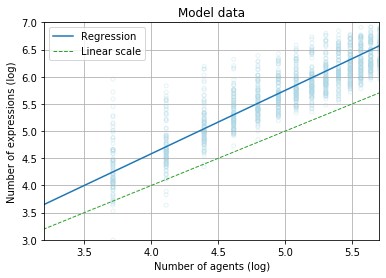

In [21]:
ax = plt.figure().add_subplot()

df = np.log(results2.loc[:, ("Agents", "N")] + 1)

reg_xy(df, "Agents", "N", 1).plot(x="x", y="y", c="tab:blue", grid=True, label="Regression", ax=ax)

np.log(results1 + 1).plot.scatter(x="Agents", y="N", s=15.0, alpha=0.3, edgecolors="lightblue", c="none", marker="o", ax=ax)
#ax.fill_between(x=df.Agents, y1=(df.N * 0.95), y2=(df.N * 1.05), color="lightblue")

pd.DataFrame({"x" : [0, 1, 2, 3, 4, 5, 6, 7, 8], "y" : [0, 1, 2, 3, 4, 5, 6, 7, 8]}).plot(x="x", y="y", c="tab:green", xlim=(3.2,5.7), ylim=(3,7), linestyle="--", linewidth=1, grid=True, legend=True, label="Linear scale", ax=ax).set(xlabel="Number of agents (log)", ylabel="Number of expressions (log)", title="Model data")

# plt.savefig("m-line-ag_expr.png", bbox_inches="tight")
plt.show()

This plot captural the rate at which the number of expressions increases with the number of agents, with the colored line showing the mean number of agent expressions for a set number of agents. The grey are illustrates the standard error of the mean.

With a scaling exponent of 1.1 it closely resembles real-world data.

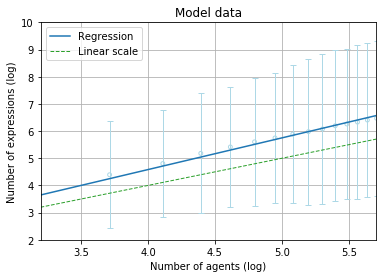

In [22]:
ax = plt.figure().add_subplot()

df = np.log(results2.loc[:, ("Agents", "N", "Nstd", "Nsem")] + 1)

reg_xy(df, "Agents", "N", 1).plot(x="x", y="y", c="tab:blue", grid=True, label="Regression", ax=ax)

df.plot.scatter(x="Agents", y="N", s=15.0, edgecolors="lightblue", c="none", marker="o", ax=ax)
ax.errorbar(x=df.Agents, y=df.N, yerr=df.Nsem, color="none", ecolor="lightblue", elinewidth=1.0, capsize=3.0)
#ax.fill_between(x=df.Agents, y1=(df.N * 0.95), y2=(df.N * 1.05), color="lightblue")

pd.DataFrame({"x" : [0, 1, 2, 3, 4, 5, 6, 7, 8], "y" : [0, 1, 2, 3, 4, 5, 6, 7, 8]}).plot(x="x", y="y", c="tab:green", xlim=(3.2,5.7), ylim=(2,10), linestyle="--", linewidth=1, grid=True, legend=True, label="Linear scale", ax=ax).set(xlabel="Number of agents (log)", ylabel="Number of expressions (log)", title="Model data")

# plt.savefig("m-line-ag_expr.png", bbox_inches="tight")
plt.show()

In [23]:
# Calculating regression statistics:
from scipy.stats import linregress
df = np.log(results2.loc[:, ("Agents", "N")] + 1)
lr = linregress(df.Agents, df.N)
print("Slope = " + str(lr[0] )+ "\n" +
      "Intercept = " + str(lr[1]) + "\n" +
      "R2 = "  + str(lr[2]) + "\n" +
      "p = " + str(lr[3]) + "\n" +
      "Error = " + str(lr[4]) + "\n" +
      "CI = " + str(linregress(df.Agents, df.N)[4]*1.96))

Slope = 1.166024699237267
Intercept = -0.08055341444195019
R2 = 0.9911230435981145
p = 8.86812406076877e-13
Error = 0.043380004518069865
CI = 0.08502480885541694


In addition, we also look how agent valence, arousal, and the field charge are affected by the number of agents.

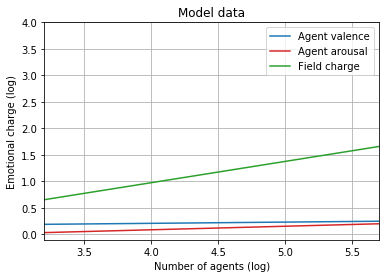

In [24]:
ax = plt.figure(figsize=(6,4)).add_subplot(111)

df = results2.loc[:, ("Agents", "v", "a", "h")]

reg_xy(np.log(df+1), "Agents", "v", 1).plot(x="x", y="y", c="tab:blue", label="Agent valence", ax=ax)
reg_xy(np.log(df+1), "Agents", "a", 1).plot(x="x", y="y", c="tab:red", label="Agent arousal", ax=ax)
reg_xy(np.log(df+1), "Agents", "h", 1).plot(x="x", y="y", xlim=(3.2,5.7), ylim=(-0.1,4), c="tab:green", label="Field charge", grid=True, ax=ax).set(xlabel="Number of agents (log)", ylabel="Emotional charge (log)", title="Model data")

#plt.set_xticks([0.0, 0.5, 1.0, 1.5, ])
# plt.savefig("m-line-charge.png", bbox_inches="tight")
plt.show()